In [1]:
# The goal with this training exercise will be to produce visualizations of real-time COVID-19
# data that is being provided by usafacts.org (which is where the CDC
# gets their numbers)

# the structure of the program will be to 
# 1.  Read in and filter the data from the online repository
#  1a.  make a plot of the COVID cases per county for several different counties
# to show that un-normalized data can be misleading
# 2.  Calculate rate of increase per day, normalized to the county; and compute a running average of cases
# 2a.  make plots that take a random draw of counties and plots their normalized
#  cases over time
# 3a.  Compute higher order time derivatives of the plots to make a predictive model

# throughout the program will be comment parts the begin with "#advanced programming:" 
# these are ways to augment the program beyond its current capabilities; 
# as you progress through your training this summer, I encourage you to try and tackle 
# some of these advanced programming tasks to better your own knowledge

# we are going to use the pandas package to read in and store the data
# pandas is useful for when the data in your arrays is not entirely numerical
# you can go to the webURL https://usafacts.org/visualizations/coronavirus-covid-19-spread-map/
# to see where we're obtaining the data for this program

%reset -f   

            # this is a reset command that resets all of your variables and values
           # it's a good habit to put this at the beginning of all of your programs 
            # for when you need to run it from scratch; it effectively does the same thing 
            # as resetting the kernel but kernel resets should be used more for debugging
#restart()

In [2]:
# this cell contains all of my library imports; whether I use all of these libraries doesn't matter
# I'm putting here anything that I think I *might* use
# you can think of this first cell as your toolbox for solving the problem of this program
import csv # csv is a library that allows python to recognized Comma Separated Value files, which 
            # are arrays that store data in a particularly common format that we will be reading
import pandas as pd  # pandas is a special package that is designed to store and manipulate data
                    # in arrays very quickly and efficiently
import numpy as np  # good ol' numpy for all its array goodness
import datetime   # this is a special function that will allow us to translate the dates in the file, 
                # which are normally just read as numbers, into dates that can be read and understood
                # by the progrma as times
import matplotlib.pyplot as plt   # for access to plotting tools

pd.set_option('display.min_rows', 50) # this is an option I'm setting to control the output rows we display 
pd.set_option('display.max_rows', 60) # in the notebook; since the dataset is much larger than we should ever 
                    # display all at once, we can control how many rows are output with a command like this
                            

In [3]:
# this cell reads in COVID-19 data from a URL
# you should go to this URL to see what the data looks like before reading it into your program

# when reading in data from a table using pandas, there are special read functions
# to handle files that are in various formats;  the format of the data we're looking at is csv
# which is the default output from excel spreadsheets; csv stands for "comma separated values"
# meaning that every element in the array is separated by a comma

# by default, the pandas function "read_csv" will assume that the first line in the file 
# is the header information from the columns in the data file, the header contains information 
# we want as header info, but it also contains dates which are actual data we want to store 
# and work with, not just keep as header information 

# since the header contains data we need, and the default for the read function expects a header 
# row, then we need to tell the read runction not to read it in as a normal header, so we 
# set the option (header=None) in the function argument, after the URL

# each object that is created below (cases, cases_h, pop, and deaths) can be thought of as an array, but it
# is more precisely a PANDAS DATAFRAME; a dataframe is like an array with extra info that pandas
# uses to speed up all operations we do with that array; so, in this example, I will refer
# to our data array as a dataframe, but for visualizing them in your mind, they are effectively
# the same thing as a normal array

# here i'm reading in the data without the header
# this file contains the number of cases over time separated by county, which is the data
# I'm going to start with

# here is the function call that grabs the data without the header (keyword argument header=None)
cases = pd.read_csv(
    'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv',
    header=None)

# here i'm reading in the data with the header; though we will be working primarily with the cases dataframe 
# data, which does not contain the formatted header info we will also be using cases_h at some point 
# to take advantage of how Pandas stores info (you'll see why I'm doing this later); since I'm reading 
# the header info, and some of that information is dates, I'm putting in a special option so that it 
# doesn't think those are just numbers (parse_dates=True)
cases_h = pd.read_csv(
    'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_confirmed_usafacts.csv',
    parse_dates=True)

# the above function calls will get the most recent data from that site.  if the site url or data format
# changes, then the above call will have to be changed

# pop is for reading in the population of each county; uncomment this function call when you get to the point
# in the program where it tells you to compute per capita data
pop = pd.read_csv(
    'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv')

# deaths is for reading in the confirmed covid deaths; uncomment this function call when you're ready to 
# to face the reaper and do some death analysis
deaths = pd.read_csv('https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_deaths_usafacts.csv')

np.shape(cases) # here is the shape of the dataframe that the data created; the format is rows, columns
                # there should be around 3196 rows (1 for each county in the US), and some number of columns
                # in the hundreds, which are the number of days since data collection began

/Users/david/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,2

(3194, 495)

In [4]:
np.shape(cases_h)   # notice that cases_h, the one that read the header and kept it in the header, rather 
                    # than moving the header info into the array, has one fewer row than the cases dataframe

(3193, 495)

In [5]:
# a summary output of how pandas sees the data stored in cases
# the data that's contained in this file is the cumulative number of cases reported
# each day in that county
#cases

#cases_h
#uncomment the above line to see what cases_h looks like with the header info; be sure you can see the difference
# between cases and cases_h

In [6]:
# Since each row is a different county, I can access data for a specific county 
# by selecting a full row; in a pandas dataframe, a full row is not just the index of the row, it is a range
# writing cases[108:109] will show me all of index 108 for this pandas dataframe, 
# which is Maricopa County in Arizona

cases[108:109]

,0,1,2,3,4,5,6,7,8,9,...,485,486,487,488,489,490,491,492,493,494
108,4015,Mohave County,AZ,04,0,0,0,0,0,0,...,22874,22887,22898,22911,22927,22935,22937,22963,22984,23007


In [7]:
# the format of the dataframe contains time series data in columns and different counties in rows
# the default format for time series data used in pandas is to have
# each different time in rows, then different counties in columns
# so our first task is to reshape our input dataframe to interchange the xy axes
# essentially just swapping our rows and columns

# we can use the function "transpose" to interchange the axes of our dataframe
# this way, the dates will be in the rows as pandas likes them
t_cases = cases.transpose();

t_cases   # now my axes have been switched
#t_cases[:][108]

#advanced programming
#instead of transposing the array, try to create a new dataframe here that puts it in the form you
# want by using the pandas "pivot" function

,0,1,2,3,4,5,6,7,8,9,...,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193
0,countyFIPS,0,1001,1003,1005,1007,1009,1011,1013,1015,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
1,County Name,Statewide Unallocated,Autauga County,Baldwin County,Barbour County,Bibb County,Blount County,Bullock County,Butler County,Calhoun County,...,Niobrara County,Park County,Platte County,Sheridan County,Sublette County,Sweetwater County,Teton County,Uinta County,Washakie County,Weston County
2,State,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY
3,StateFIPS,01,01,01,01,01,01,01,01,01,...,56,56,56,56,56,56,56,56,56,56
4,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
# the first 4 rows in our transposed dataframe are just header information
# the data to be plotted is all contained after row 4 and can be selected by county

# for all of the data I'm going to plot, I'll need the same range of dates for each
# so here's how I isolate those into a variable I'm calling dates


#dates = t_cases[0][4:]; 
dates = pd.to_datetime(t_cases[0][4:])  # a couple of things here:  "to_datetime" is a pandas 
                    # function that converts the input
                    # into a time-like object that pandas can easily read/manipulate;  t_cases[0][4:] is a special 
                    # way of formatting an array call (called a 'slice') so that it only displays a subset of the 
                    # data; in this case, I'm selecting [0] for the first index, 
                    # meaning the first column in the dataframe t_cases, 
                    # and [4:] to say that I want to start with the 4th index (meaning the fifth row) and then 
                    # read all of those values as dates; 
                    # so in summary, I'm just picking out the dates from the array


#t_cases[0][4:]  # here is what the subset of the dataframe looks like with the selection [0][4:] that I made above

# to select a specific column x, we use t_cases[:][x]; so for Maricopa 
#t_cases[:][108]

# if we want it without the header info, use t_cases[4:][108]


# advanced programming:  go through and edit above this cell to request and store a user selected list of counties
# to compare against one another

In [9]:
# and here is what pandas sees now that we've told it to interpret those as dates
# notice that the information is the same, but the format has changed
# also, the datatype (dtype) has now changed from an 'object' to 'datetime64', which is the special 
# time format that pandas likes
dates

4     2020-01-22
5     2020-01-23
6     2020-01-24
7     2020-01-25
8     2020-01-26
9     2020-01-27
10    2020-01-28
11    2020-01-29
12    2020-01-30
13    2020-01-31
14    2020-02-01
15    2020-02-02
16    2020-02-03
17    2020-02-04
18    2020-02-05
19    2020-02-06
20    2020-02-07
21    2020-02-08
22    2020-02-09
23    2020-02-10
24    2020-02-11
25    2020-02-12
26    2020-02-13
27    2020-02-14
28    2020-02-15
         ...    
470   2021-05-02
471   2021-05-03
472   2021-05-04
473   2021-05-05
474   2021-05-06
475   2021-05-07
476   2021-05-08
477   2021-05-09
478   2021-05-10
479   2021-05-11
480   2021-05-12
481   2021-05-13
482   2021-05-14
483   2021-05-15
484   2021-05-16
485   2021-05-17
486   2021-05-18
487   2021-05-19
488   2021-05-20
489   2021-05-21
490   2021-05-22
491   2021-05-23
492   2021-05-24
493   2021-05-25
494   2021-05-26
Name: 0, Length: 491, dtype: datetime64[ns]

In [10]:
# Now, our goal with this program is to use the larger dataset in t_cases to make plots 
# of individual counties over time.  
# initially, we'd like to take an arbitrary number of counties that we define, compute the per-capita total 
# COVID cases, and plot those all together over the same time range 

# advanced programming:  take a user defined set of counties, compute and plot the 2,5, and 9 day running 
# averages over the same time range, along with their associated errors

# So, if we can write our program to extract and plot 1 arbitrary county from the dataframe
# then we just iterate over some list of counties in order to produce a plot with 
# multiple counties

# In order to do this with Pandas, we have to recognize that the format the 
# data was read in, is not the format Pandas prefers.
# Pandas and all its time functionality seem built around the idea of 
# the time series being all in one column

# our case was further complicated by the fact that some of the data (namely the dates), 
# are being stored in the header, rather than in the frame itself
# to get around this, we've used the read-in method to put the header information into the dataframe itself, 
# rather than just in the header, and transposed that dataframe so that the dates are now in the first column

# in extracting the data for a county, it will ultimately be easier to reorganize, 
# or recreate our dataframe so that it only has a "date" column, and a value column

# So, let's try to create a new data frame here
# it should have dates as rows in the first column
# it should have county_FIPS (a unique  identifier for each county) as columns in the first row
# it should have the values for each county and each date in the rest of the array

In [11]:
# Making a new data frame

# we created dates above, which will serve as one column in our new dataframe

# for the other columns, which show each counties numbers, 
# we want all but the first (since the first column contained the dates)
# we can do this by using the .loc and .iloc functions, which are two very fast methods
# for sifting through data; any dataframe can use the loc functions (like t_cases here)
# the difference between .loc and .iloc is that .loc is intended to be used for column/label data
# whereas .iloc is used for integer values within the dataframe

# the main reason that they are different is that pandas is a specifically programmed package to do things
# with dataframes very quickly, and especially so for specific datatypes within that dataframe
# since our # of cases, population, and deaths data are all integers, it makes sense to 
# utilize this extra efficient method provided by pandas

# as an argument loc wants to know what data within the frame you'd like to select.  it then stores the location
# of the data, rather than the data itself, so that anytime I want to use that data
# I can just point to it with the variable t_cases_cols defined below

# type t_cases.columns[1:] in a separate execution cell to see what kind of object it produces

#t_cases_cols = t_cases.columns[1:]

#t_cases_cols = t_cases[0,1:56037]

t_cases_cols = t_cases.loc[0,1:56037] # here, my values in brackets are stating what 
                        # data I want.  The first coordinate, 0, says to start with the first row
                        # (which is where all of the county IDs are stored)
                        # and go from the second column all the way to the end 
                        #  going over list of county IDs from beinning to end,
                        #  the numbering is not linear. the county IDs go up to 56037
                        # but there are only about 3200 counties total
#t_cases_cols = t_cases[0]
#t_cases_cols

# so we've got our dates as rows, our counties as columns, and now we want the array to be 
# populated with the data for each date and county

# to accomplish this, I'm going to use a function called iloc, which like .loc above, stores only the 
# positions of the data in the dataframe, without moving, or modifying the values themselves.  
# accidently modifying array values is a common 
# issue that happens with beginner programmers, and so using iloc help to prevent that from occuring

cts = t_cases.iloc[4:,1:]; # in the function call for iloc, it wants a range of rows and columns 
                            # from which to store the location info; so I've chosen [4:,1:] to select 
                            # the data that starts in the 5th row (index [4:]), and the second column
                            # (index [1:])
                            # it's important to note here that this method of slicing creates a new 
                            # dataframe from t_cases.  Since t_cases is a dataframe itself
                            # I found that I needed to recast it later as a 2D numpy array 
                            # before then recombining it with the other info to make my new dataframe
            

# with all 3 of these variables (dates, t_cases.columns, and cts)
# I can now reassemble my data into a pandas dataframe


In [12]:
t_cases_cols.shape

(3193,)

In [13]:
# need to check data type of the list we just created
cts.dtypes 

1       object
2       object
3       object
4       object
5       object
6       object
7       object
8       object
9       object
10      object
11      object
12      object
13      object
14      object
15      object
16      object
17      object
18      object
19      object
20      object
21      object
22      object
23      object
24      object
25      object
         ...  
3169    object
3170    object
3171    object
3172    object
3173    object
3174    object
3175    object
3176    object
3177    object
3178    object
3179    object
3180    object
3181    object
3182    object
3183    object
3184    object
3185    object
3186    object
3187    object
3188    object
3189    object
3190    object
3191    object
3192    object
3193    object
Length: 3193, dtype: object

In [14]:
# it says the data are all type 'object', which is sort-of a pandas catch all data type
# if we want to be able to work with the data in any way, it's preferable to be more specific
# as to what the data type really is; in this instance, number of cases is an intenger value
# so we should change the dataype in the cts thusly: 
cts = cts.astype(int)
cts.dtypes
#cts

1       int64
2       int64
3       int64
4       int64
5       int64
6       int64
7       int64
8       int64
9       int64
10      int64
11      int64
12      int64
13      int64
14      int64
15      int64
16      int64
17      int64
18      int64
19      int64
20      int64
21      int64
22      int64
23      int64
24      int64
25      int64
        ...  
3169    int64
3170    int64
3171    int64
3172    int64
3173    int64
3174    int64
3175    int64
3176    int64
3177    int64
3178    int64
3179    int64
3180    int64
3181    int64
3182    int64
3183    int64
3184    int64
3185    int64
3186    int64
3187    int64
3188    int64
3189    int64
3190    int64
3191    int64
3192    int64
3193    int64
Length: 3193, dtype: object

In [15]:
# since I'm going to be creating a data frame, I need to ensure that all of the dimensions match up
# in particular, I want the shape of dates to be all rows, the shape of t_cases_cols to be all columns, 
# and the shape of cts to have "dates" number of rows, and "t_cases_cols" number of columns

dates.shape, t_cases_cols.shape, cts.shape

((491,), (3193,), (491, 3193))

In [30]:
# the data types don't need to match up, but it's sometimes helpful to know what they are, since pandas
# treats different data types differently in its operations 
# if you want to check the datatypes, you can uncomment the below statement
#print(dates.dtypes,"\n\n",cts.dtypes,"\n\n",t_cases_cols)  # the "\n" is how you force it to print a new line

In [31]:
# here is where I recast my dataframe cts, as a numpy array, which I'm then going to stick into my custom-made
# data frame for plotting
# cast data frame as numpy array
ncts= cts.to_numpy()
#ncts

In [32]:
# now I'm using the DataFrame function to create my custom dataframe
# first input is the values in the numpy array ncts, second input is the rows, third input is the columns
new_df = pd.DataFrame(ncts,index=dates,columns=t_cases_cols)

In [33]:
new_df

,0,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
new_df['4013']

0
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         1
2020-01-27         1
2020-01-28         1
2020-01-29         1
2020-01-30         1
2020-01-31         1
2020-02-01         1
2020-02-02         1
2020-02-03         1
2020-02-04         1
2020-02-05         1
2020-02-06         1
2020-02-07         1
2020-02-08         1
2020-02-09         1
2020-02-10         1
2020-02-11         1
2020-02-12         1
2020-02-13         1
2020-02-14         1
2020-02-15         1
               ...  
2021-05-02    538124
2021-05-03    538633
2021-05-04    539080
2021-05-05    539632
2021-05-06    539926
2021-05-07    540547
2021-05-08    541202
2021-05-09    541555
2021-05-10    542072
2021-05-11    542486
2021-05-12    542856
2021-05-13    543198
2021-05-14    543928
2021-05-15    544676
2021-05-16    544980
2021-05-17    545051
2021-05-18    545468
2021-05-19    545875
2021-05-20    546247
2021-05-21    546516
2021-05-22    547035
2021-05-23 

<AxesSubplot:xlabel='0'>

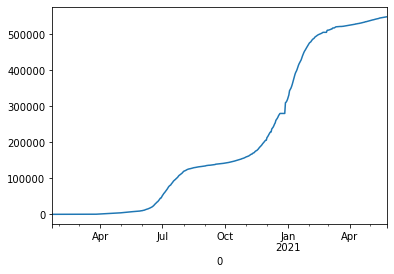

In [35]:
#new_df  # if you want to output the resulting dataframe, uncomment this line

# at this point you could also just plot the data for any given county if you know 
# which column in the dataframe it's located
# for example, Maricopa county has countyFIPS = 4013 in our new data frame, which I can plot thusly
plt.close('all'); # makes sure I'm starting fresh
plt.figure();  # instantiate my figure object
new_df['4013'].plot() # the part in brackets is calling a specific column that is named '4013'

#new_df.dtypes  # here are the datatypes in our new frame that we are going to be plotting

In [162]:
new_df['4013']

0
2020-01-22         0
2020-01-23         0
2020-01-24         0
2020-01-25         0
2020-01-26         1
2020-01-27         1
2020-01-28         1
2020-01-29         1
2020-01-30         1
2020-01-31         1
2020-02-01         1
2020-02-02         1
2020-02-03         1
2020-02-04         1
2020-02-05         1
2020-02-06         1
2020-02-07         1
2020-02-08         1
2020-02-09         1
2020-02-10         1
2020-02-11         1
2020-02-12         1
2020-02-13         1
2020-02-14         1
2020-02-15         1
               ...  
2021-05-02    538124
2021-05-03    538633
2021-05-04    539080
2021-05-05    539632
2021-05-06    539926
2021-05-07    540547
2021-05-08    541202
2021-05-09    541555
2021-05-10    542072
2021-05-11    542486
2021-05-12    542856
2021-05-13    543198
2021-05-14    543928
2021-05-15    544676
2021-05-16    544980
2021-05-17    545051
2021-05-18    545468
2021-05-19    545875
2021-05-20    546247
2021-05-21    546516
2021-05-22    547035
2021-05-23 

In [36]:
# begin part 2

# to select a specific county for plotting, we can use the county id number (countyFIPS), which we have stored
# in cases; or the county name, which we stored elsewhere
# this is where our original storage of the header information (cases_h) comes in handy

# I can use that dataframe with the original header to match up which county corresponds to which county ID
# so, if I wanted the ID for Maricopa county, I could type

#cases_h.loc[cases_h['County Name']=='Maricopa County']

cases_h.loc[cases_h['County Name']=='Adams County '] # Adams county PA 42001

# and this will give me the full listing for Maricopa county

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26
250,8001,Adams County,CO,8,0,0,0,0,0,0,...,58722,58802,58991,59080,59162,59264,59317,59366,59466,59525
565,16003,Adams County,ID,16,0,0,0,0,0,0,...,341,341,341,341,341,341,341,341,341,341
609,17001,Adams County,IL,17,0,0,0,0,0,0,...,8476,8503,8520,8543,8551,8551,8551,8569,8581,8592
712,18001,Adams County,IN,18,0,0,0,0,0,0,...,3763,3765,3766,3768,3770,3772,3772,3772,3773,3773
806,19003,Adams County,IA,19,0,0,0,0,0,0,...,338,338,339,340,341,341,341,341,341,341
1426,28001,Adams County,MS,28,0,0,0,0,0,0,...,2886,2950,2950,2951,2954,2954,2954,2988,2990,2992
1682,31001,Adams County,NE,31,0,0,0,0,0,0,...,2972,2975,2981,2988,2990,2990,2990,2992,2993,2993
2025,38001,Adams County,ND,38,0,0,0,0,0,0,...,270,270,270,270,270,270,270,270,270,270
2079,39001,Adams County,OH,39,0,0,0,0,0,0,...,2400,2401,2402,2402,2403,2405,2405,2405,2406,2406
2283,42001,Adams County,PA,42,0,0,0,0,0,0,...,9433,9448,9465,9475,9490,9490,9517,9522,9524,9537


In [37]:
# since I want to be able to select the data in my new data frame by using the countyFIPS (which was the only other
# data I put in my new dataframe), I can extract that countyFIPS if I know the county name as such: 
temp = cases_h.loc[cases_h['County Name']=='Maricopa County']

# the temp variable above is an object that is storing the data that I ouput in the cell above
# since that object is an array with all of the column info present, I can call on a specific
# cells header (like countyFIPS) to get that information

#new_df[temp]
tfips = temp['countyFIPS']  # this stores the county FIPS
tfips

Series([], Name: countyFIPS, dtype: int64)

In [38]:
# so the county ID for Maricopa county is 4013
# modify the above code to get the county IDs for 3 other counties


In [39]:
# I can use the same idea to write a lookup table of counties by state, in case I want to search through a list
#pd.set_option('display.min_rows', 25)  # an option to change the minimum number of rows that are output
#cases_h.loc[cases_h['State']=='NY']
#cases_h.loc[cases_h['County Name']=='Richmond County']
#cases_h.loc[cases_h['County Name']=='New York County']
cases_h.loc[cases_h['County Name']=='Queens County ']
#cases_h.loc[cases_h['County Name']=='Richmond County']


,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26
1901,36081,Queens County,NY,36,0,0,0,0,0,0,...,269787,269923,270047,270186,270329,270460,270578,270669,270767,270863


In [40]:
n1 = cases_h.loc[cases_h['countyFIPS']==4013]
n2 = cases_h.loc[cases_h['countyFIPS']==36005] # bronx
n3 = cases_h.loc[cases_h['County Name']=='New York County '] # manhatten, 36061
n4 = cases_h.loc[cases_h['countyFIPS']==36085]  # richmond county (staten island)
n5 = cases_h.loc[cases_h['County Name']=='Queens County '] # Queens, 36081
n6 = cases_h.loc[cases_h['countyFIPS']==36047] # Brooklyn
#n7 = cases

#n6 = cases_h.loc[cases_h['County Name']=='New York County']

#n1["County Name"]

#New York County (Manhattan)
#Kings County (Brooklyn)
#Bronx County (The Bronx)
#Richmond County (Staten Island)
#and Queens County (Queens).

In [41]:
n1 = cases_h.loc[cases_h['countyFIPS']==4013]
n1

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26
106,4013,Maricopa County,AZ,4,0,0,0,0,1,1,...,545051,545468,545875,546247,546516,547035,547298,547645,548006,548519


In [150]:
# so let's compare Maricopa county, AZ and Bronx County, NY
# those are fips == 4013, and 36005 respectively 

# to plot those, I write

#label1 = n1 # names for my legend
#label2 = n2 

plt.close('all'); # makes sure I'm starting fresh
plt.figure();  # instantiate my figure object

#ax.plot(x, np.sin(x), '-b', label='Sine')
#ax.legend(loc='upper left', frameon=False)

#new_df['4013'].plot()

d1 = new_df['4013']  # here i'm access the dataframe we created, and looking for the column that matches
                    # the countyFIPS 
d2 = new_df['36005']

d3 = new_df['42001']


# here are the plotting commands for each curve; the function is "line" (for line plot) 
# from within the plot library
ax = d1.plot.line(color='Orange', label="Maricopa County");
d2.plot.line(color='Blue', label="Bronx County"); 
d3.plot.line(color='Red', label='Adams County')
ax.legend(loc='upper left', frameon=True)


# you can see that as bad as Maricopa county was, Bronx county was worse
# another thing you can see is that the curve for Bronx county is beginning to level off
# while the curve for Maricopa county is on the rise

# since these counties are different sizes, it would be nice to do a per-capita comparison
# which will be the subject of the next portion of our program

KeyError: '42001'

<Figure size 432x288 with 0 Axes>

In [43]:
# to do a per capita calculation, I need to know the population of the county, 
# which is stored in a different spreadsheet from the cases data

# you should refer back to the first cell where we use read_csv and uncomment the line for pop
# then execute the cell again in order to fill pop with the population data
pop

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
5,1009,Blount County,AL,57826
6,1011,Bullock County,AL,10101
7,1013,Butler County,AL,19448
8,1015,Calhoun County,AL,113605
9,1017,Chambers County,AL,33254


In [44]:
# this dataframe has headers: countyFIPs, County Name, State, population 
# so to calculate the percapita covid cases, we need to take the total number of cases
# and divide by the population 
# here is one way to do that quickly

#cases_h.loc[cases_h['County Name']=='Maricopa County'



tpop1 = pop.loc[pop['countyFIPS']==4013]
#tpop1
#tpop1['population']

#new_df['4013']
percap1 = new_df['4013']/4485414
#percap1


tpop2 = pop.loc[pop['countyFIPS']==36005]
#tpop2
#tpop2['population']

percap2 = new_df['36005']/1418207
#percap2


#advanced programming:  currently we are reading the county population and putting it in manually (as above)
# instead, you should edit this so that the population data is read automatically from the table, 
# storing that variable, and then using it to compute the per capita values

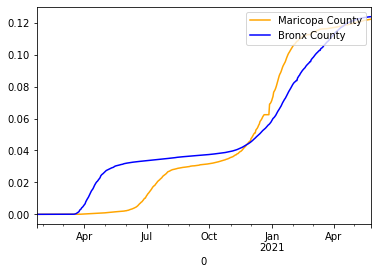

In [45]:

#cases.head(1)

plt.close('all'); # makes sure I'm starting fresh
plt.figure();  # instantiate my figure object

ax = percap1.plot.line(color='Orange', label="Maricopa County");
percap2.plot.line(color='Blue', label="Bronx County")
ax.legend(loc='upper right', frameon=True)


In [217]:
# So, on a per capita basis, the situation looks even worse in the Bronx 
# than even the number of cases intially suggested

# Now, we're going to calculate the number of new cases as a function of time
# in order to plot this, we want to create a data frame that contains the same rows and column headings as 
# before, but now we want to fill the dataframe with values of just the new cases, rather than the total 
# cases.  The new cases can be computed by 
# taking the total cases on a given day, and subtracting the total cases from the day before
# this will result in a list of points that is 1 element shorter than what we need (because at day 0, 
# there will have been no previous day to compute)

# the structure of the dataframe has already been set, what we need to do is a calculation on the data in the frame
# where we take, for a given county, the value in row n row and subtract from it the value in the n-1 row

# this looks like: 

#new_df['4013'], new_df['36005']

#new_df['4013']-new_df['36005'] # this does an element by element subtraction comparing the 2 counties, 
                                # if you wanted to do that for some reason
    
# I can use this same format to compute the new cases.  If I duplicate the array data, but I shift all of 
# rows that the data are stored in by 1, then by subtracting my new array from my previous array, I will be 
# subtracting the previous days data from the current days

#to accomplish this, I'm using the shift function from pandas.  The shift function takes tabular data and shifts it
# by period number of rows or columns.  In this case, 
shift_up = new_df.shift(periods=1, axis='rows') # here is the same array, new_df, that has its rows shifted
                                            # down by 1

shift_up

# uncomment the previous command and 
# notice the first row has NaN, because all the data was shifted down, so the first date now has nothing


,0,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [47]:
# here I can see the output of my two data frames
#new_df['4013'], shift_up['4013']

# notice that last entry in shift_up is actually the second to last entry in new_df
# confirming that I have shifted the dataframe contents down by 1

# now, I can just subtract shift_up from new_df and it will perform a line-by-line subtraction 
# within each array and then output a new array with the difference
# see next cell

In [220]:

# now diff is a dataframe that just contains the difference between new_df and shift_up
diff = new_df - shift_up
#diff # uncomment to see our new data frame
#diff['4013']  # uncomment to see Maricopa county new cases
#diff['36005'] # uncomment to see Bronx county new cases



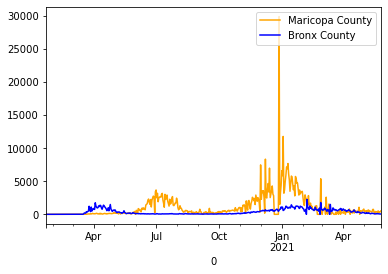

In [49]:
# plot the new cases in each over time
new_1 = diff['4013']
new_2 = diff['36005']


n3 = diff['36061'] # manhatten, 36061
n4 = diff['36085'] # richmond county (staten island)
n5 = diff['36081'] # Queens, 36081
n6 = diff['36047'] # Brooklyn




plt.close('all'); # makes sure I'm starting fresh

ax = new_1.plot.line(color='Orange', label="Maricopa County");
new_2.plot.line(color='Blue', label="Bronx County")
#n3.plot.line(color='Red', label="Manhatten")
#n4.plot.line(color='Pink', label="Staten Island")
#n5.plot.line(color='Purple', label="Queens")
#n6.plot.line(color='Green', label="Brooklyn")

ax.legend(loc='upper right', frameon=True)

# here is a plot of just the new cases, where you can see that the new cases in arizona
# are beginning to exceed those in ny

# because of reporting inconsistencies, it may also be useful instead showed a running 5-day average
# we can compute this by doing the same sort of shift as shown above, but by changing the period of the shift 

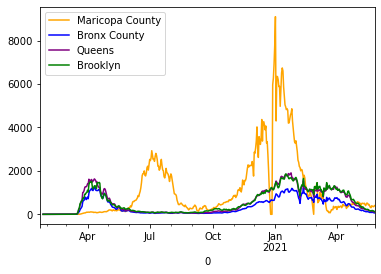

In [50]:
avg=5
shift_up = new_df.shift(periods=avg, axis='rows') # here is the same array, new_df, that has its rows shifted
                                            # down by 5, so when I do a subtraction, I'm going to be
                                            # calculating the new cases over a 5 day period

#new_df
#shift_up

diff = (new_df - shift_up)/avg   # since the new cases calculated for 5 days, and I need new cases per day, 
                                # I should divide this by the same number I used in my shift, which is 5
#diff
#diff['4013']
#diff['36005']

# plot the new cases in each over time
new_1 = diff['4013']
new_2 = diff['36005']

n3 = diff['36061'] # manhatten, 36061
n4 = diff['36085'] # richmond county (staten island)
n5 = diff['36081'] # Queens, 36081
n6 = diff['36047'] # Brooklyn

plt.close('all'); # makes sure I'm starting fresh

ax = new_1.plot.line(color='Orange', label="Maricopa County");
new_2.plot.line(color='Blue', label="Bronx County")
#n3.plot.line(color='Red', label="Manhatten")
#n4.plot.line(color='Pink', label="Staten Island")
n5.plot.line(color='Purple', label="Queens")
n6.plot.line(color='Green', label="Brooklyn")
ax.legend(loc='upper left', frameon=True)

# this is now showing the 5-day running average, wherre it is more obvious that AZ is on a much worse
# trajectory than Bronx

In [51]:
# and again, we can compute this percapita running 5-day average
new_diff = (new_df - shift_up)/5
#diff
#diff['4013']
#diff['36005']

# plot the new cases in each over time
new_1 = new_diff['4013']
new_2 = new_diff['36005']

n3 = diff['36061'] # manhatten, 36061
n4 = diff['36085'] # richmond county (staten island)
n5 = diff['36081'] # Queens, 36081
n6 = diff['36047'] # Brooklyn

#new_df['4013']
new_percap1 = new_1/4485414
#new_percap1

new_percap2 = new_2/1418207
#new_percap2



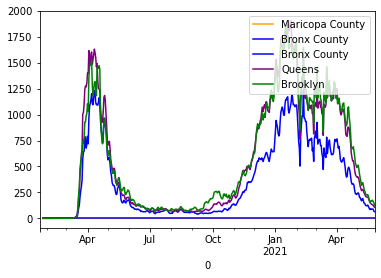

In [52]:
plt.close('all'); # makes sure I'm starting fresh

ax = new_percap1.plot.line(color='Orange', label="Maricopa County");
new_percap2.plot.line(color='Blue', label="Bronx County")

new_2.plot.line(color='Blue', label="Bronx County")
#n3.plot.line(color='Red', label="Manhatten")
#n4.plot.line(color='Pink', label="Staten Island")
n5.plot.line(color='Purple', label="Queens")
n6.plot.line(color='Green', label="Brooklyn")

ax.legend(loc='upper right', frameon=True)
ax.legend(loc='upper right', frameon=True)

# from this plot, we can see that in terms of per-capita new cases, Bronx and Maricopa counties are 
# getting quite close

In [53]:
# end of part 2
# this is all just meant as a semi-useful exploration of python functionality
# you should go back through this tutorial and vary the number of counties, which counties, and what sort
# of daily averaging you do and then make some plots to compare

In [54]:
#jupyter notebook list

In [55]:
new_df = pd.DataFrame(ncts,index=dates,columns=t_cases_cols)
avg2=10
shift_up = new_df.shift(periods=avg2, axis='rows')
diff10 = (new_df-shift_up)/avg2

In [56]:
cases_h.loc[cases_h['County Name']=='Adams County ']

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26
250,8001,Adams County,CO,8,0,0,0,0,0,0,...,58722,58802,58991,59080,59162,59264,59317,59366,59466,59525
565,16003,Adams County,ID,16,0,0,0,0,0,0,...,341,341,341,341,341,341,341,341,341,341
609,17001,Adams County,IL,17,0,0,0,0,0,0,...,8476,8503,8520,8543,8551,8551,8551,8569,8581,8592
712,18001,Adams County,IN,18,0,0,0,0,0,0,...,3763,3765,3766,3768,3770,3772,3772,3772,3773,3773
806,19003,Adams County,IA,19,0,0,0,0,0,0,...,338,338,339,340,341,341,341,341,341,341
1426,28001,Adams County,MS,28,0,0,0,0,0,0,...,2886,2950,2950,2951,2954,2954,2954,2988,2990,2992
1682,31001,Adams County,NE,31,0,0,0,0,0,0,...,2972,2975,2981,2988,2990,2990,2990,2992,2993,2993
2025,38001,Adams County,ND,38,0,0,0,0,0,0,...,270,270,270,270,270,270,270,270,270,270
2079,39001,Adams County,OH,39,0,0,0,0,0,0,...,2400,2401,2402,2402,2403,2405,2405,2405,2406,2406
2283,42001,Adams County,PA,42,0,0,0,0,0,0,...,9433,9448,9465,9475,9490,9490,9517,9522,9524,9537


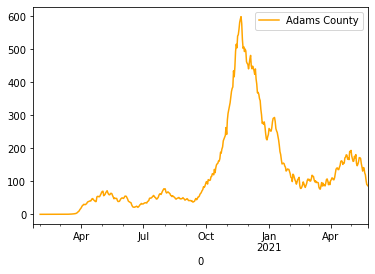

In [57]:
# Making graphs of running average over a 10-day period 
new_diff101 = diff10['8001']
ax = new_diff101.plot.line(color='Orange', label="Adams County")
ax.legend(loc='upper right', frameon=True)

In [58]:
#cases_h.loc[cases_h['County Name']=='Clark County ']

In [159]:
new_diff102 = diff10['32003']


In [60]:
#cases_h.loc[cases_h['County Name']=='Fulton County ']

In [61]:
new_diff103 = diff10['13121']

In [62]:
#cases_h.loc[cases_h['County Name']=='Mercer County ']

In [63]:
new_diff104 = diff10['34021']

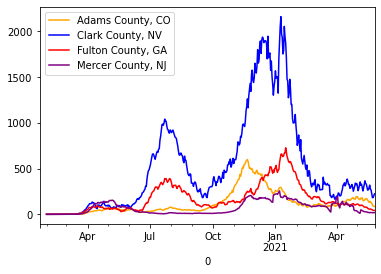

In [64]:
new_diff101 = diff10['8001']
new_diff102 = diff10['32003']
new_diff103 = diff10['13121']
new_diff104 = diff10['34021']

ax = new_diff101.plot.line(color='Orange', label="Adams County, CO");
new_diff102.plot.line(color='Blue', label="Clark County, NV");
new_diff103.plot.line(color='Red', label="Fulton County, GA");
new_diff104.plot.line(color='Purple', label="Mercer County, NJ")
ax.legend(loc='upper left', frameon=True)

In [65]:
# Making graphs for the running average over 14-day period 
new_df = pd.DataFrame(ncts,index=dates,columns=t_cases_cols)
avg3 = 14
shift_up = new_df.shift(periods=avg3, axis='rows')
diff14 = (new_df-shift_up)/avg3

In [66]:
#cases_h.loc[cases_h['County Name']=='Fulton County ']

In [67]:
new_diff141 = diff14['8001']
new_diff142 = diff14['32003']
new_diff143 = diff14['13121']
new_diff144 = diff14['34021']

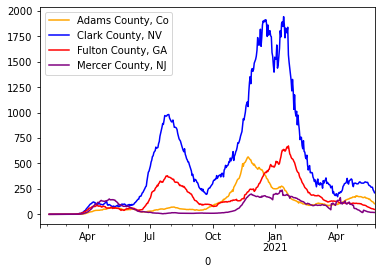

In [68]:
new_diff141 = diff14['8001']
new_diff142 = diff14['32003']
new_diff143 = diff14['13121']
new_diff144 = diff14['34021']

ax = new_diff141.plot.line(color = 'Orange', label = "Adams County, Co");
new_diff142.plot.line(color = 'Blue', label = "Clark County, NV");
new_diff143.plot.line(color = 'Red', label = "Fulton County, GA");
new_diff144.plot.line(color = 'Purple', label = "Mercer County, NJ")
ax.legend(loc='upper left', frameon=True)

In [69]:
#Making graphs of deaths over time
deaths = pd.read_csv('https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_deaths_usafacts.csv',
                    header=None)


/Users/david/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (0,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,2

In [70]:
deaths

,0,1,2,3,4,5,6,7,8,9,...,485,486,487,488,489,490,491,492,493,494
0,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26
1,0,Statewide Unallocated,AL,01,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1001,Autauga County,AL,01,0,0,0,0,0,0,...,108,108,108,109,109,110,110,110,110,110
3,1003,Baldwin County,AL,01,0,0,0,0,0,0,...,310,310,310,310,310,310,310,310,310,310
4,1005,Barbour County,AL,01,0,0,0,0,0,0,...,56,56,56,58,58,58,58,58,58,58
5,1007,Bibb County,AL,01,0,0,0,0,0,0,...,64,64,64,64,64,64,64,64,64,64
6,1009,Blount County,AL,01,0,0,0,0,0,0,...,139,139,139,139,139,139,139,139,139,139
7,1011,Bullock County,AL,01,0,0,0,0,0,0,...,42,42,42,42,42,42,42,42,42,42
8,1013,Butler County,AL,01,0,0,0,0,0,0,...,69,69,69,69,69,70,70,70,70,70
9,1015,Calhoun County,AL,01,0,0,0,0,0,0,...,319,319,319,321,321,322,322,322,323,323


In [71]:
# Since we want all of the dates to be in a column, we first want to transpose the "deaths" dataframe 
t_deaths = deaths.transpose();
t_deaths

,0,1,2,3,4,5,6,7,8,9,...,3184,3185,3186,3187,3188,3189,3190,3191,3192,3193
0,countyFIPS,0,1001,1003,1005,1007,1009,1011,1013,1015,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
1,County Name,Statewide Unallocated,Autauga County,Baldwin County,Barbour County,Bibb County,Blount County,Bullock County,Butler County,Calhoun County,...,Niobrara County,Park County,Platte County,Sheridan County,Sublette County,Sweetwater County,Teton County,Uinta County,Washakie County,Weston County
2,State,AL,AL,AL,AL,AL,AL,AL,AL,AL,...,WY,WY,WY,WY,WY,WY,WY,WY,WY,WY
3,StateFIPS,01,01,01,01,01,01,01,01,01,...,56,56,56,56,56,56,56,56,56,56
4,2020-01-22,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2020-01-23,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,2020-01-24,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2020-01-25,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2020-01-26,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2020-01-27,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
# We now want to make sure that the columns are understood as times, so we want to use the to_datetime function

t_deaths[0][4:]
dates_d = pd.to_datetime(t_deaths[0][4:])
dates_d

4     2020-01-22
5     2020-01-23
6     2020-01-24
7     2020-01-25
8     2020-01-26
9     2020-01-27
10    2020-01-28
11    2020-01-29
12    2020-01-30
13    2020-01-31
14    2020-02-01
15    2020-02-02
16    2020-02-03
17    2020-02-04
18    2020-02-05
19    2020-02-06
20    2020-02-07
21    2020-02-08
22    2020-02-09
23    2020-02-10
24    2020-02-11
25    2020-02-12
26    2020-02-13
27    2020-02-14
28    2020-02-15
         ...    
470   2021-05-02
471   2021-05-03
472   2021-05-04
473   2021-05-05
474   2021-05-06
475   2021-05-07
476   2021-05-08
477   2021-05-09
478   2021-05-10
479   2021-05-11
480   2021-05-12
481   2021-05-13
482   2021-05-14
483   2021-05-15
484   2021-05-16
485   2021-05-17
486   2021-05-18
487   2021-05-19
488   2021-05-20
489   2021-05-21
490   2021-05-22
491   2021-05-23
492   2021-05-24
493   2021-05-25
494   2021-05-26
Name: 0, Length: 491, dtype: datetime64[ns]

In [73]:
#We now want to store the countyFIPS, which we will do with the iloc function
t_deaths_fips = t_deaths.loc[0,1:56037]
#t_deaths_fips
#t_deaths_fips
t_deaths_fips.shape

(3193,)

In [114]:
#We now want to store the location of death counts per day 
deaths_cts = t_deaths.iloc[4:,1:]
deaths_cts.shape

(491, 3193)

In [115]:
#Checking the datatype of deaths_cts
deaths_cts.dtypes

1       object
2       object
3       object
4       object
5       object
6       object
7       object
8       object
9       object
10      object
11      object
12      object
13      object
14      object
15      object
16      object
17      object
18      object
19      object
20      object
21      object
22      object
23      object
24      object
25      object
         ...  
3169    object
3170    object
3171    object
3172    object
3173    object
3174    object
3175    object
3176    object
3177    object
3178    object
3179    object
3180    object
3181    object
3182    object
3183    object
3184    object
3185    object
3186    object
3187    object
3188    object
3189    object
3190    object
3191    object
3192    object
3193    object
Length: 3193, dtype: object

In [165]:
# Knowing that the datatype of these elements are all integers, let's change the datatype to integer 
deaths_cts = deaths_cts.astype(int)
#deaths_cts.dtypes


In [166]:
#Checking shape to make sure that the dimenaiona of the array are correct dates_d.shape, t_deaths_fips.shape, deaths_cts.shape

In [167]:
#Casting our deaths_cts into a numpy array prior to creating the new dataframe 
ndeaths_cts=deaths_cts.to_numpy()

In [168]:
#Creating the new dataframe 
new_df_d = pd.DataFrame(ndeaths_cts,index=dates_d,columns=t_deaths_fips)

In [169]:
new_df_d

,0,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,,,,,,,,,,,,,,,,,,,,,
2020-01-22,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-27,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-28,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-29,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2020-01-30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [174]:
d1 = deaths_h.loc[deaths_h['County Name']=='Adams County ']
d1

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26
250,8001,Adams County,CO,8,0,0,0,0,0,0,...,687,689,691,692,694,694,694,694,695,695
565,16003,Adams County,ID,16,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
609,17001,Adams County,IL,17,0,0,0,0,0,0,...,157,158,158,158,158,158,158,158,158,158
712,18001,Adams County,IN,18,0,0,0,0,0,0,...,56,56,56,56,56,56,56,56,56,56
806,19003,Adams County,IA,19,0,0,0,0,0,0,...,4,4,4,4,4,4,4,4,4,4
1426,28001,Adams County,MS,28,0,0,0,0,0,0,...,82,82,82,82,82,82,82,82,82,82
1682,31001,Adams County,NE,31,0,0,0,0,0,0,...,46,46,46,46,46,46,46,46,46,46
2025,38001,Adams County,ND,38,0,0,0,0,0,0,...,3,3,3,3,3,3,3,3,3,3
2079,39001,Adams County,OH,39,0,0,0,0,0,0,...,53,54,54,54,54,54,54,54,54,54
2283,42001,Adams County,PA,42,0,0,0,0,0,0,...,182,182,182,182,182,182,182,182,183,183


In [175]:
deaths1 = new_df_d['8001']
deaths1

0
2020-01-22      0
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
             ... 
2021-05-02    669
2021-05-03    670
2021-05-04    671
2021-05-05    673
2021-05-06    672
2021-05-07    672
2021-05-08    673
2021-05-09    673
2021-05-10    673
2021-05-11    674
2021-05-12    682
2021-05-13    684
2021-05-14    685
2021-05-15    686
2021-05-16    687
2021-05-17    687
2021-05-18    689
2021-05-19    691
2021-05-20    692
2021-05-21    694
2021-05-22    694
2021-05-23    694
2021-05-24    694
2021-05-25    695
2021-05-26    695
Name: 8001, Length: 491, dtype: int64

In [176]:
d2 = deaths_h.loc[deaths_h['County Name']=='Clark County ']
d2

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26
124,5019,Clark County,AR,5,0,0,0,0,0,0,...,41,41,41,41,41,41,41,41,41,41
580,16033,Clark County,ID,16,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
620,17023,Clark County,IL,17,0,0,0,0,0,0,...,41,41,41,41,41,41,41,41,41,41
721,18019,Clark County,IN,18,0,0,0,0,0,0,...,201,201,201,201,201,201,201,201,201,201
917,20025,Clark County,KS,20,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
1035,21049,Clark County,KY,21,0,0,0,0,0,0,...,29,29,29,29,29,29,29,29,29,30
1531,29045,Clark County,MO,29,0,0,0,0,0,0,...,7,7,7,7,7,7,7,7,7,7
1777,32003,Clark County,NV,32,0,0,0,0,0,0,...,4360,4366,4370,4375,4376,4376,4376,4383,4387,4393
2090,39023,Clark County,OH,39,0,0,0,0,0,0,...,299,301,301,301,301,301,301,301,302,302
2415,46025,Clark County,SD,46,0,0,0,0,0,0,...,5,5,5,5,5,5,5,6,6,5


In [177]:
deaths2 = new_df_d['32003']
deaths2

0
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
2020-01-27       0
2020-01-28       0
2020-01-29       0
2020-01-30       0
2020-01-31       0
2020-02-01       0
2020-02-02       0
2020-02-03       0
2020-02-04       0
2020-02-05       0
2020-02-06       0
2020-02-07       0
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       0
2020-02-12       0
2020-02-13       0
2020-02-14       0
2020-02-15       0
              ... 
2021-05-02    4300
2021-05-03    4309
2021-05-04    4315
2021-05-05    4322
2021-05-06    4323
2021-05-07    4330
2021-05-08    4330
2021-05-09    4330
2021-05-10    4339
2021-05-11    4342
2021-05-12    4345
2021-05-13    4351
2021-05-14    4358
2021-05-15    4358
2021-05-16    4358
2021-05-17    4360
2021-05-18    4366
2021-05-19    4370
2021-05-20    4375
2021-05-21    4376
2021-05-22    4376
2021-05-23    4376
2021-05-24    4383
2021-05-25    4387
2021-05-26    4393
Name: 32003, Length: 491, dty

In [178]:
d3 = deaths_h.loc[deaths_h['County Name']=='Fulton County ']
d3

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26
139,5049,Fulton County,AR,5,0,0,0,0,0,0,...,47,47,47,47,47,47,47,47,47,47
457,13121,Fulton County,GA,13,0,0,0,0,0,0,...,1390,1393,1393,1395,1398,1404,1404,1404,1406,1408
637,17057,Fulton County,IL,17,0,0,0,0,0,0,...,63,63,63,63,63,63,63,64,65,65
736,18049,Fulton County,IN,18,0,0,0,0,0,0,...,40,40,40,40,40,40,40,40,40,41
1048,21075,Fulton County,KY,21,0,0,0,0,0,0,...,14,14,14,14,14,14,14,14,14,14
1878,36035,Fulton County,NY,36,0,0,0,0,0,0,...,91,91,91,91,91,91,91,91,91,91
2104,39051,Fulton County,OH,39,0,0,0,0,0,0,...,69,70,70,70,70,70,70,70,71,71
2311,42057,Fulton County,PA,42,0,0,0,0,0,0,...,15,15,15,15,15,15,15,15,15,15


In [179]:
deaths3 = new_df_d['13121']
deaths3

0
2020-01-22       0
2020-01-23       0
2020-01-24       0
2020-01-25       0
2020-01-26       0
2020-01-27       0
2020-01-28       0
2020-01-29       0
2020-01-30       0
2020-01-31       0
2020-02-01       0
2020-02-02       0
2020-02-03       0
2020-02-04       0
2020-02-05       0
2020-02-06       0
2020-02-07       0
2020-02-08       0
2020-02-09       0
2020-02-10       0
2020-02-11       0
2020-02-12       0
2020-02-13       0
2020-02-14       0
2020-02-15       0
              ... 
2021-05-02    1368
2021-05-03    1370
2021-05-04    1370
2021-05-05    1373
2021-05-06    1373
2021-05-07    1383
2021-05-08    1384
2021-05-09    1384
2021-05-10    1384
2021-05-11    1387
2021-05-12    1388
2021-05-13    1388
2021-05-14    1389
2021-05-15    1390
2021-05-16    1390
2021-05-17    1390
2021-05-18    1393
2021-05-19    1393
2021-05-20    1395
2021-05-21    1398
2021-05-22    1404
2021-05-23    1404
2021-05-24    1404
2021-05-25    1406
2021-05-26    1408
Name: 13121, Length: 491, dty

In [180]:
d4 = deaths_h.loc[deaths_h['County Name']=='Mercer County ']
d4

,countyFIPS,County Name,State,StateFIPS,2020-01-22,2020-01-23,2020-01-24,2020-01-25,2020-01-26,2020-01-27,...,2021-05-17,2021-05-18,2021-05-19,2021-05-20,2021-05-21,2021-05-22,2021-05-23,2021-05-24,2021-05-25,2021-05-26
674,17131,Mercer County,IL,17,0,0,0,0,0,0,...,35,35,35,35,35,35,35,35,35,35
1094,21167,Mercer County,KY,21,0,0,0,0,0,0,...,50,50,50,50,50,50,50,50,50,50
1573,29129,Mercer County,MO,29,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2
1815,34021,Mercer County,NJ,34,0,0,0,0,0,0,...,942,943,944,944,945,946,946,947,949,949
2053,38057,Mercer County,ND,38,0,0,0,0,0,0,...,10,10,10,10,10,10,10,10,10,10
2132,39107,Mercer County,OH,39,0,0,0,0,0,0,...,85,85,85,85,85,85,85,85,85,85
2325,42085,Mercer County,PA,42,0,0,0,0,0,0,...,256,256,256,256,256,256,256,256,257,257
3068,54055,Mercer County,WV,54,0,0,0,0,0,0,...,116,116,116,117,117,117,117,117,117,119


In [181]:
deaths4 = new_df_d['34021']
deaths4

0
2020-01-22      0
2020-01-23      0
2020-01-24      0
2020-01-25      0
2020-01-26      0
2020-01-27      0
2020-01-28      0
2020-01-29      0
2020-01-30      0
2020-01-31      0
2020-02-01      0
2020-02-02      0
2020-02-03      0
2020-02-04      0
2020-02-05      0
2020-02-06      0
2020-02-07      0
2020-02-08      0
2020-02-09      0
2020-02-10      0
2020-02-11      0
2020-02-12      0
2020-02-13      0
2020-02-14      0
2020-02-15      0
             ... 
2021-05-02    933
2021-05-03    933
2021-05-04    936
2021-05-05    936
2021-05-06    936
2021-05-07    937
2021-05-08    937
2021-05-09    936
2021-05-10    936
2021-05-11    937
2021-05-12    939
2021-05-13    940
2021-05-14    942
2021-05-15    942
2021-05-16    942
2021-05-17    942
2021-05-18    943
2021-05-19    944
2021-05-20    944
2021-05-21    945
2021-05-22    946
2021-05-23    946
2021-05-24    947
2021-05-25    949
2021-05-26    949
Name: 34021, Length: 491, dtype: int64

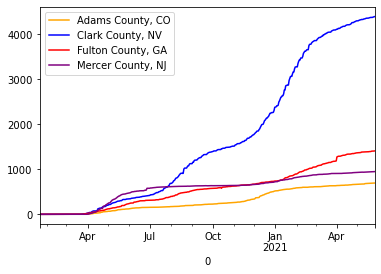

In [183]:
plt.close('all'); # makes sure I'm starting fresh
plt.figure(); 

ax = deaths1.plot.line(color='Orange', label="Adams County, CO");
deaths2.plot.line(color='Blue', label="Clark County, NV");
deaths3.plot.line(color='Red', label="Fulton County, GA");
deaths4.plot.line(color='Purple', label="Mercer County, NJ")
ax.legend(loc='upper left', frameon=True)

In [188]:
# Graphing deaths per capita. To do this, we first need to access the dataframe containing total popuation information
# for each county. 


pop = pd.read_csv(
    'https://usafactsstatic.blob.core.windows.net/public/data/covid-19/covid_county_population_usafacts.csv')
pop

,countyFIPS,County Name,State,population
0,0,Statewide Unallocated,AL,0
1,1001,Autauga County,AL,55869
2,1003,Baldwin County,AL,223234
3,1005,Barbour County,AL,24686
4,1007,Bibb County,AL,22394
5,1009,Blount County,AL,57826
6,1011,Bullock County,AL,10101
7,1013,Butler County,AL,19448
8,1015,Calhoun County,AL,113605
9,1017,Chambers County,AL,33254


In [196]:
dpop1 = pop.loc[pop['countyFIPS']==8001]
dpop1['population'] # The population of Adams County, CO is 517421

deathscap1 = new_df_d['8001']/517421

In [200]:
dpop2 = pop.loc[pop['countyFIPS']==32003]
dpop2['population'] #The population of Clark County, NV is 2266715

deathscap2 = new_df_d['32003']/2266715

In [207]:
dpop3 = pop.loc[pop['countyFIPS']==13121]
dpop3['population'] #The population of Fulton County, GA is 1063937

deathscap3 = new_df_d['13121']/1063937

In [211]:
dpop4 = pop.loc[pop['countyFIPS']==34021]
dpop4['population'] #The population of Mercer County, NJ is 367430

deathscap4 = new_df_d['34021']/367430

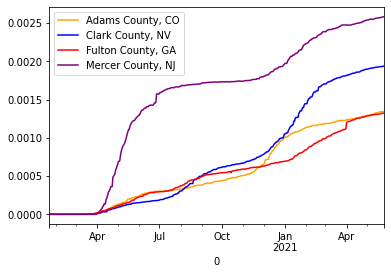

In [212]:
plt.close('all'); # makes sure I'm starting fresh
plt.figure(); 

ax = deathscap1.plot.line(color='Orange', label="Adams County, CO");
deathscap2.plot.line(color='Blue', label="Clark County, NV");
deathscap3.plot.line(color='Red', label="Fulton County, GA");
deathscap4.plot.line(color='Purple', label="Mercer County, NJ")
ax.legend(loc='upper left', frameon=True)

In [213]:
#Calculating new deaths per day. FIrst, we need to shift the dataframe down by 1, and then subtract the dataframe 
#new_df_d from this shifted one entry by entry to find the new number of deaths per day. 

shift_up_d = new_df_d.shift(periods=1, axis='rows')
shift_up_d

,0,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-25,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-26,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [236]:
diff_d = new_df_d-shift_up_d

In [227]:
diff_1_d = diff_d['8001']

In [228]:
diff_2_d = diff_d['32003']

In [233]:
diff_3_d = diff_d['13121']

In [234]:
diff_4_d = diff_d['34021']

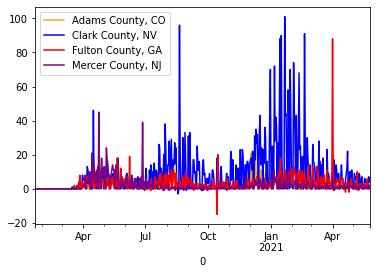

In [237]:
plt.close('all'); # makes sure I'm starting fresh
plt.figure(); 

ax = diff_1_d.plot.line(color='Orange', label="Adams County, CO");
diff_2_d.plot.line(color='Blue', label="Clark County, NV");
diff_3_d.plot.line(color='Red', label="Fulton County, GA");
diff_4_d.plot.line(color='Purple', label="Mercer County, NJ");
ax.legend(loc='upper left', frameon=True)

In [275]:
#Graphing the running average of new deaths over a 5-day period.
avg=5
shift_up_d2 =new_df_d.shift(periods=avg, axis='rows')

diff_d = (new_df_d-shift_up_d2)/avg




,0,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2020-01-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


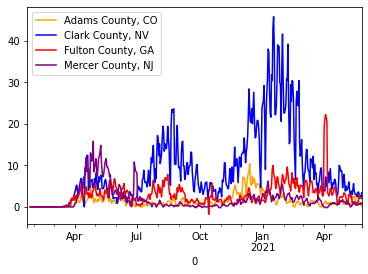

In [277]:
diff_d = (new_df_d-shift_up_d2)/avg

diff1 = diff_d['8001']
diff2 = diff_d['32003']
diff3 = diff_d['13121']
diff4 = diff_d['34021']

ax = diff1.plot.line(color='Orange', label="Adams County, CO");
diff2.plot.line(color='Blue', label="Clark County, NV");
diff3.plot.line(color='Red', label="Fulton County, GA");
diff4.plot.line(color='Purple', label="Mercer County, NJ")
ax.legend(loc='upper left', frameon=True)


In [288]:
#Graphing Running Averages of Deaths Over a 10-Day Period
avg2 = 10
shift_up_d3 = new_df_d.shift(periods=avg2, axis='rows')

diff_d2 = (new_df_d-shift_up_d3)/avg2


In [289]:
diff_d2

,0,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


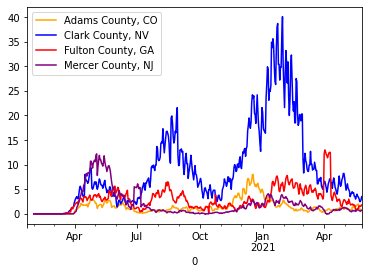

In [291]:
diffb_1 = diff_d2['8001']
diffb_2 = diff_d2['32003']
diffb_3 = diff_d2['13121']
diffb_4 = diff_d2['34021']

ax = diffb_1.plot.line(color='Orange', label="Adams County, CO");
diffb_2.plot.line(color='Blue', label="Clark County, NV");
diffb_3.plot.line(color='Red', label="Fulton County, GA");
diffb_4.plot.line(color='Purple', label="Mercer County, NJ")
ax.legend(loc='upper left', frameon=True)


In [296]:
#Graphing Running Average of Deaths over 14-Day Period
avg3 = 14
shift_up_d4 = new_df_d.shift(periods=avg3, axis='rows')
#shift_up_d4

diff_d3 = (new_df_d-shift_up_d4)/avg3


,0,1001,1003,1005,1007,1009,1011,1013,1015,1017,...,56027,56029,56031,56033,56035,56037,56039,56041,56043,56045
0,,,,,,,,,,,,,,,,,,,,,
2020-01-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-23,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-01-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


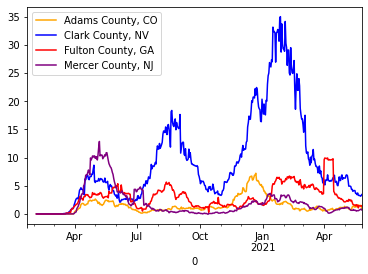

In [298]:
diffc_1 = diff_d3['8001']
diffc_2 = diff_d3['32003']
diffc_3 = diff_d3['13121']
diffc_4 = diff_d3['34021']

ax = diffc_1.plot.line(color='Orange', label="Adams County, CO");
diffc_2.plot.line(color='Blue', label="Clark County, NV");
diffc_3.plot.line(color='Red', label="Fulton County, GA");
diffc_4.plot.line(color='Purple', label="Mercer County, NJ")
ax.legend(loc='upper left', frameon=True)